# Assignment: Decision Trees and Random Forests

## 1. Business Understanding

Phishing websites are a major cybersecurity threat, aiming to steal sensitive information such as passwords or credit card details. Detecting them early is essential to protect users from financial loss, identity theft, and reputational damage.

The goal of this project is to test whether phishing websites can be reliably identified using simple, automatically collected features such as SSL certificate status, URL patterns, web traffic, and link structure. A successful model could support the development of an automated warning system that alerts users before they enter a phishing site.

Two approaches will be used:

1. **Decision Trees** – to create a transparent, human-readable model that can be directly translated into analyst instructions.

2. **Random Forests** – to improve predictive accuracy through an ensemble of decision trees.

The project seeks to balance **interpretability** (decision tree rules that are understandable to an internet analyst) and **accuracy** (improved prediction via random forests). If successful, the models can form the foundation of a practical phishing detection tool, contributing to safer online interactions for end-users.


## 2. Data understanding

The dataset used in this project is the **[Phishing Websites Data Set](https://archive.ics.uci.edu/dataset/327/phishing+websites)** from the UCI Machine Learning Repository. It contains **11,055 instances** with **30 predictive features**, all integer-valued and with no missing values. The **target variable** `Result` is encoded as:

- **-1 = phishing site**
- **1 = legitimate site**


The Phishing Websites dataset is fetched from the UCI Machine Learning Repository via the `ucimlrepo` library.

In [105]:
from ucimlrepo import fetch_ucirepo 
  
# Fetch the Phishing Websites dataset by its ID (327)
phishing_websites = fetch_ucirepo(id=327) 
  
# Separate the explanatory variables (features) and the target variable 
X = phishing_websites.data.features     # Features
y = phishing_websites.data.targets      # Target variable

#### 2.1. Feature Overview

The features represent structural and behavioral properties of websites that can be collected automatically. They are designed to capture common tricks used in phishing attacks. Examples include:

- **URL and domain structure**:  
  - *IP Address*: phishing URLs may use numeric IPs instead of domain names.  
  - *URL Length*: overly long URLs can hide malicious elements.  
  - *Prefix-Suffix*: hyphens in domains (e.g., `paypal-security.com`) often imitate real sites.  
  - *Having Subdomain*: excessive subdomains may disguise a malicious site.  
  - *HTTPS-token*: misleading use of “https” inside the domain name.  

- **Security indicators**:  
  - *SSLfinal_State*: validity of the SSL certificate.  
  - *Domain Registration Length* and *Age of Domain*: short-lived or newly created domains are more suspicious.  
  - *DNS Record*: missing or abnormal DNS entries suggest fraud.  

- **Content and linking patterns**:  
  - *Request URL* and *URL of Anchor*: percentage of external objects or anchor links leading outside the domain.  
  - *Links in Tags*: external links inside `<meta>`, `<script>`, and `<link>` tags.  
  - *Favicon*: loading icons from external sources instead of the main site.  
  - *Links Pointing to Page*: legitimate sites typically have more inbound links.  

- **User interaction tricks**:  
  - *On-mouseover*: changes in the browser’s status bar on hover.  
  - *RightClick* and *PopUpWindow*: disabling user actions or forcing pop-ups.  
  - *Iframe*: use of hidden frames to load external content.  

- **Traffic and reputation**:  
  - *Web Traffic*: phishing sites typically have very low visitor numbers.  
  - *PageRank*, *Google Index*: trusted sites are usually ranked and indexed.  
  - *Statistical Report*: cross-check against known phishing/malware blacklists.  


The following code displays the variable information of the dataset. The output shows all the variable names along with their roles (e.g., feature or target) and data types.

In [106]:
# Display variable information 
display(phishing_websites.variables) 

,name,role,type,demographic,description,units,missing_values
0,having_ip_address,Feature,Integer,None,None,None,no
1,url_length,Feature,Integer,None,None,None,no
2,shortining_service,Feature,Integer,None,None,None,no
3,having_at_symbol,Feature,Integer,None,None,None,no
4,double_slash_redirecting,Feature,Integer,None,None,None,no
5,prefix_suffix,Feature,Integer,None,None,None,no
6,having_sub_domain,Feature,Integer,None,None,None,no
7,sslfinal_state,Feature,Integer,None,None,None,no
8,domain_registration_length,Feature,Integer,None,None,None,no
9,favicon,Feature,Integer,None,None,None,no


The following table summarizes the variables contained in this dataset:
<br>


| Feature                    | Explanation                                                                                   |
|-----------------------------|-----------------------------------------------------------------------------------------------|
| Using the IP Address        | If the URL uses an IP address instead of a domain name (phishers often hide domain names).    |
| URL-Length                  | Very long URLs can be suspicious (used to hide malicious parts).                              |
| Shortening-Service          | Use of services like bit.ly or tinyurl can hide the true destination.                         |
| having-At-Symbol            | An “@” symbol in a URL may redirect to a different site.                                      |
| double-slash-redirecting    | Extra `//` after the protocol may indicate redirection tricks.                                |
| Prefix-Suffix               | Use of a hyphen “-” in the domain (e.g., paypal-security.com) often mimics real sites.        |
| having-Sub-Domain           | Too many subdomains (e.g., login.bank.example.phish.com) can be a trick.                      |
| SSLfinal-State              | Checks if the SSL certificate is valid (fake or expired SSL is a warning sign).               |
| Domain-registration-length  | Domains registered for a very short time are more likely to be malicious.                     |
| Favicon                     | A favicon loaded from an external domain (not the main site) can signal phishing.             |
| port                        | Use of uncommon or suspicious ports instead of standard ones (80/443).                        |
| HTTPS-token                 | Misuse of “https” inside the domain name (e.g., https-login.com) to fake security.            |
| Request-URL                 | Percentage of external objects (images, scripts, etc.) loaded from outside domains.           |
| URL-of-Anchor               | Percentage of anchor (`<a>`) tags leading to outside or empty links.                          |
| Links-in-tags               | Percentage of links inside `<meta>`, `<script>`, and `<link>` tags pointing outside.          |
| SFH (Server Form Handler)   | Where a form submits data (if empty or external, suspicious).                                 |
| Submitting-to-email         | Forms that submit directly to an email instead of a server.                                   |
| Abnormal_URL                | Whether the domain matches its WHOIS registration info (fake mismatch = phishing).            |
| Redirect                    | Number of times the site redirects (too many = suspicious).                                   |
| On-mouseover                | If hovering changes the link shown in the status bar (a common phishing trick).               |
| RightClick                  | Disabling right-click to prevent users from inspecting elements or code.                      |
| popUpWindow                 | Presence of pop-ups, often used in scams.                                                     |
| Iframe                      | Use of hidden frames (`<iframe>`) to load content secretly from other sites.                  |
| Age-of-domain               | Newly created domains are more likely to be phishing.                                         |
| DNSRecord                   | Missing or abnormal DNS records may indicate a fake site.                                     |
| Web-traffic                 | Very low traffic rank (site is not popular/legitimate).                                       |
| Page-Rank                   | Low Google PageRank means the site isn’t trusted.                                             |
| Google-Index                | If the site is not indexed by Google, it may be suspicious.                                   |
| Links-pointing-to-page      | Few or no inbound links suggest a fake site.                                                  |
| Statistical-report          | Matches known phishing/malware sites in public blacklists/statistical reports.                |


Next, we explore the possible values of each feature in the dataset:

In [107]:
# Loop through all features and show unique values
for column in X:
    values = X[column].unique()
    display(values)

array([-1,  1], dtype=int64)

array([ 1,  0, -1], dtype=int64)

array([ 1, -1], dtype=int64)

array([ 1, -1], dtype=int64)

array([-1,  1], dtype=int64)

array([-1,  1], dtype=int64)

array([-1,  0,  1], dtype=int64)

array([-1,  1,  0], dtype=int64)

array([-1,  1], dtype=int64)

array([ 1, -1], dtype=int64)

array([ 1, -1], dtype=int64)

array([-1,  1], dtype=int64)

array([ 1, -1], dtype=int64)

array([-1,  0,  1], dtype=int64)

array([ 1, -1,  0], dtype=int64)

array([-1,  1,  0], dtype=int64)

array([-1,  1], dtype=int64)

array([-1,  1], dtype=int64)

array([0, 1], dtype=int64)

array([ 1, -1], dtype=int64)

array([ 1, -1], dtype=int64)

array([ 1, -1], dtype=int64)

array([ 1, -1], dtype=int64)

array([-1,  1], dtype=int64)

array([-1,  1], dtype=int64)

array([-1,  0,  1], dtype=int64)

array([-1,  1], dtype=int64)

array([ 1, -1], dtype=int64)

array([ 1,  0, -1], dtype=int64)

array([-1,  1], dtype=int64)

The output above shows that each attribute can take one of three possible values:

- **-1:** The site is classified as a phishing site.  
- **0:** The site is considered neutral or suspicious.  
- **1:** The site is classified as legitimate.  


## 3. Data preparation

The dataset should contain only the values 1 and -1, with some columns also allowing 0. To check for inconsistencies, we examined the minimum and maximum values of each column. Ideally, the minimum should be -1 or 0, and the maximum should be 1 or 0.

In [108]:
import pandas as pd

summary = pd.DataFrame({'Min': X.min(), 'Max': X.max()})
display(summary)

,Min,Max
having_ip_address,-1,1
url_length,-1,1
shortining_service,-1,1
having_at_symbol,-1,1
double_slash_redirecting,-1,1
prefix_suffix,-1,1
having_sub_domain,-1,1
sslfinal_state,-1,1
domain_registration_length,-1,1
favicon,-1,1


This result confirms that the dataset is suitable for the model. Standardization is not necessary because decision trees and random forests are insensitive to feature scale.

## 4. Decision tree

In this chapter, we build a decision tree model to classify websites as phishing or legitimate. The goal is to create a model that is both interpretable and practical, providing clear guidance for human analysts. The chapter includes:  

- A visualization of the final decision tree.  
- Evaluation metrics to assess the tree’s performance.  
- Step-by-step instructions for an internet analyst to manually determine whether a website is likely to be a phishing site, aligned directly with the logic of the decision tree.  


### Splitting the Data into Training and Testing Sets

Before training the decision tree, we split the dataset into **training** and **testing** subsets. This ensures that we can evaluate the model's performance on unseen data.  

- **Training set:** 75% of the dataset, used to train the decision tree.  
- **Testing set:** 25% of the dataset, used to evaluate the model’s accuracy and generalization.

We use the `train_test_split` function from `scikit-learn` to perform this split, setting a fixed `random_state` for reproducibility. The resulting shapes of the datasets are displayed to confirm the split:


In [109]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

# Display the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8291, 30) (2764, 30) (8291, 1) (2764, 1)


### 4.1. Modeling

In this section we build the decision tree classifier. We experimented with several `max_depth` values, and recorded the corresponding accuracy on the validation data:

<b> <b>

| max_depth | Accuracy |
|-----------|----------|
| 4         | 0.92     |
| 5         | 0.93     |
| 6         | 0.94     |
| 7         | 0.94     |
| 8         | 0.94     |
| 9         | 0.95     |
| 10        | 0.95     |
| 11        | 0.95     |

Although deeper trees achieved slightly higher accuracy, we chose a max_depth of 4 to keep the tree simple, interpretable, and easy to translate into step-by-step instructions for a human analyst.

The tree is trained using the following code:

In [110]:
# Create a Decision Tree classifier with a maximum depth of 4
tree = DecisionTreeClassifier(max_depth=4, random_state=666)

# Train the decision tree using the training data
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=666)

We visualize the trained decision tree as a plot to make it easier to understand the decision-making process and the hierarchy of feature splits. This graphical representation complements the text-based rules we printed above.

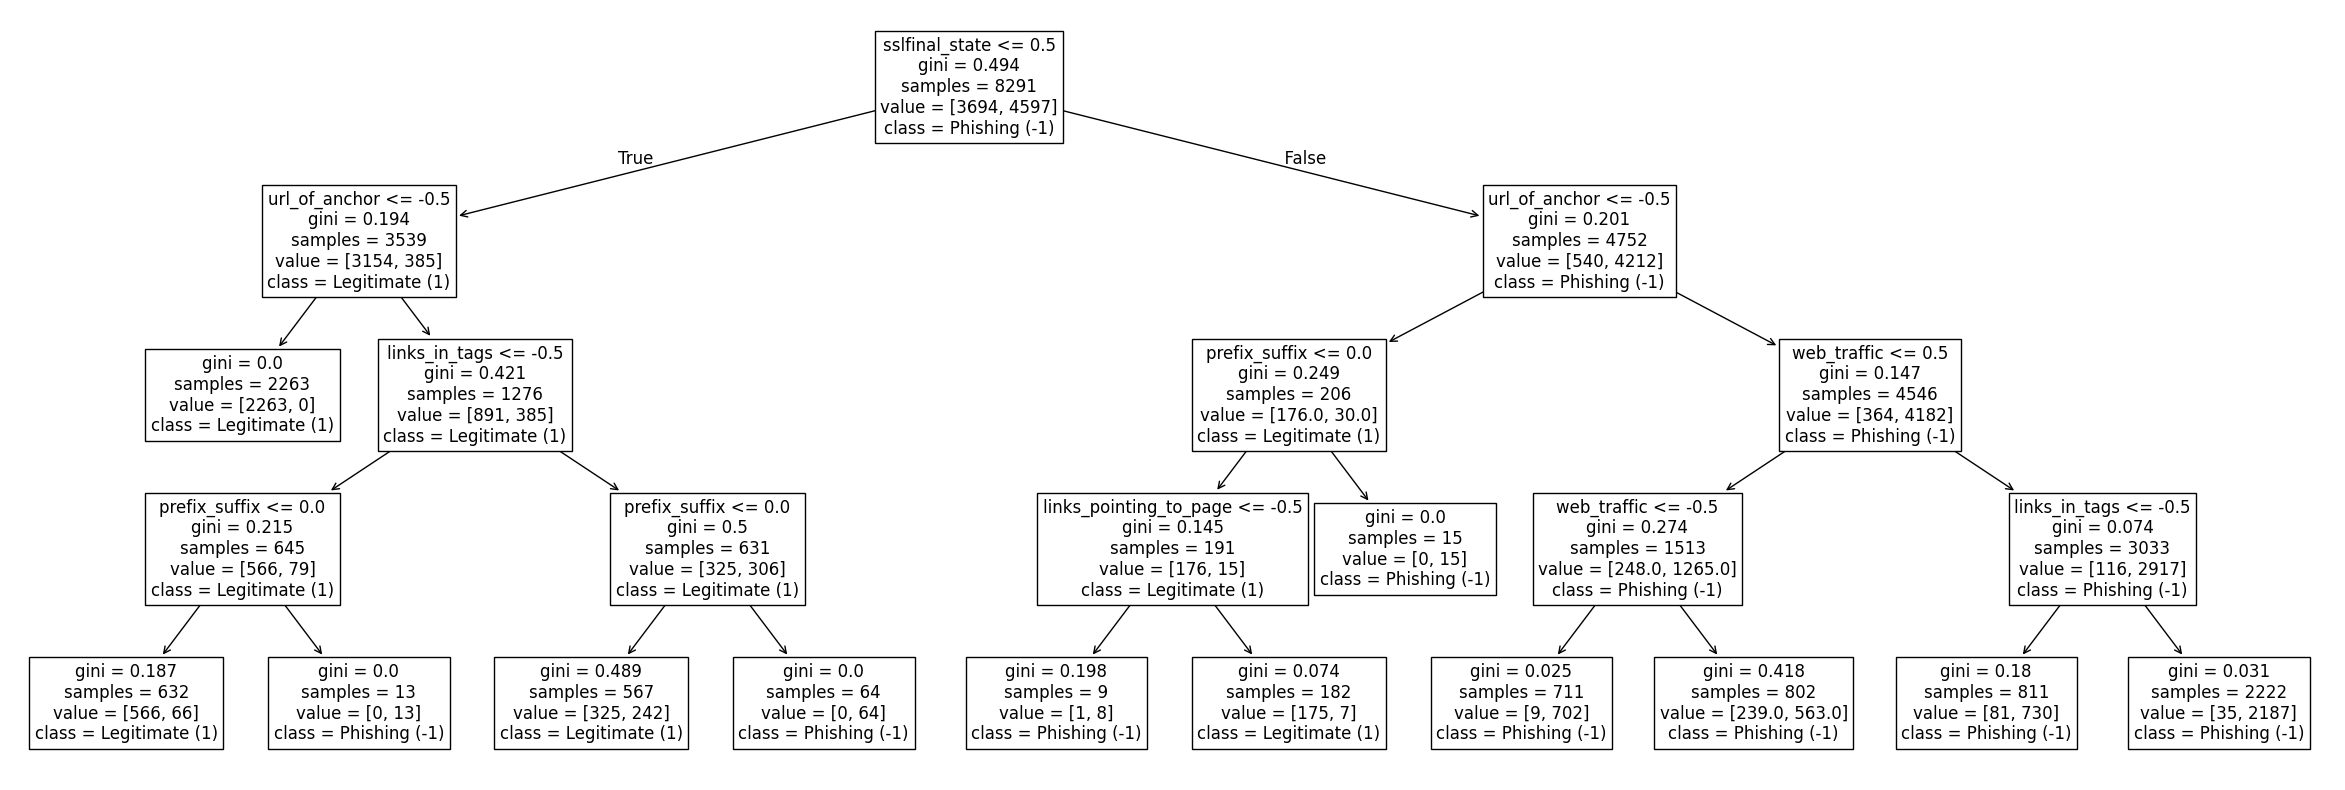

In [112]:
# Create a figure with a large size to accommodate the full tree
fig = plt.figure(figsize=(30, 10))

# Plot the decision tree
plot_tree(
    tree,
    feature_names=X.keys(), # Label the splits with the feature names
    class_names=["Legitimate (1)", "Phishing (-1)"],    # Label the classes
    fontsize=12     # Increase font size for readability
)

# Display the plot
plt.show()

Here are written directions on how to use the decision tree model manually. 

#### 1. Check sslfinal_state (SSL certificate status).

>Here you need to check whether the website has a valid SSL certificate. Phishing sites often lack proper SSL or use suspicious certificates.
>
>- If no SSL certificate, or certificate not valid → go to step 2.
>
>- If site has valid SSL certificate → go to step 5.

#### 2. Check url_of_anchor (quality of anchor links).

>This feature measures whether anchor tags (\<a\>) in the page link to the same domain or suspicious external sites. Many phishing sites have anchors pointing elsewhere or to “#”.
>
>- If anchor tags link to external sites → classify as **phishing**.
>
>- If anchor tag links lead to same domain → go to step 3.

#### 3. Check links_in_tags (links inside meta/script/link tags).

>This looks at how many links inside \<meta\>, \<script\>, and \<link\> tags point outside the site. High numbers can indicate a phishing attempt.
>
>- If many links point to external sites → go to step 4a.
>
>- If only few links lead off-site → go to step 4b.

#### 4a. Check prefix_suffix in the domain (use of “-” in URL).

>Check the domain name. Phishing domains often include hyphens (e.g. paypal-security-login.com).
>
>- If hyphens in domain name → classify as **phishing**.
>
>- If no hyphens in domain name → classify as **legitimate**.

#### 4b. Check prefix_suffix again (for the other branch).

>Same as step 4b.
>
>- If hyphens in domain name → classify as **phishing**.
>
>- If no hyphens in domain name → classify as **legitimate**.

#### 5. Check url_of_anchor again (for SSL > 0.5 case).

>Same logic as step 2, anchors pointing externally are suspicious.
>
>- If anchor tags link to external sites → classify as **phishing**.
>
>- If anchor tag links lead to same domain → go to step 3.

#### 6. Check prefix_suffix (with SSL present but suspicious anchors).

>If hyphens in domain name → then check links_pointing_to_page.
>
> ##### Check links_pointing_to_page (backlinks to this site).
>>
>>Check the amount of backlinks to the site from other sources. Legitimate websites tend to have many backlinks from other sites; phishing ones usually have very few.
>>
>>- If many links → classify as **legitimate**.
>>
>>- If few links → classify as **phishing**.
>
>If no hyphens in domain name → classify as **legitimate**

#### 7. Check web_traffic (popularity of the website).

>Check the popularity of the site by the Alexa ranking. Legitimate sites usually appear in Alexa rankings or have measurable traffic, while phishing ones rarely do.
>
>If lots of traffic →
>
>>If almost no traffic → classify as **phishing**.
>>
>>If some web traffic → classify as **phishing**.
>
>If lots of web traffic → check links_in_tags:
>
>>If many links point to external sites → classify as **phishing**.
>>
>>If only few links lead off-site → classify as **phishing**.

### 4.2. Evaluation

In this section, we evaluate the performance of the trained decision tree classifier using the test dataset.  

We calculate the **accuracy**, which measures the proportion of correctly classified websites, and the **confusion matrix**, which provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.  

These metrics help us understand how well the model can distinguish between phishing and legitimate websites on unseen data.


'Accuracy of tree classifier on the test set: 0.92'

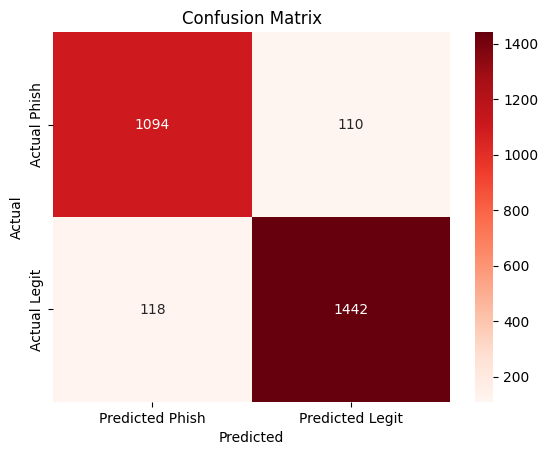

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Predict the labels for the test set using the trained decision tree
y_pred = tree.predict(X_test)

# Calculate accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred)
display(f"Accuracy of tree classifier on the test set: {accuracy_test:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["Predicted Phish", "Predicted Legit"],
            yticklabels=["Actual Phish", "Actual Legit"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


- **True Positives (TP):** 1442 – legitimate sites correctly classified.  
- **False Negatives (FN):** 118 – legitimate sites incorrectly classified as phishing.  
- **False Positives (FP):** 110 – phishing sites incorrectly classified as legitimate.  
- **True Negatives (TN):** 1094 – phishing sites correctly classified.

The model correctly identifies the majority of phishing and legitimate websites, with slightly more false positives than false negatives.

### 4.3. Deployment

The final phase of the project is to deploy the trained decision tree model to detect phishing websites in practice. 

In a real-world scenario, the model could be integrated into web browsers, email filters, or corporate security systems to automatically flag suspicious websites. When a potential phishing site is detected, the system could alert security analysts, showing both the classification and the specific features that triggered it. 

The decision tree is interpretable, so analysts can follow its step-by-step rules to manually verify suspicious websites. Additionally, the model should be periodically retrained with new data to adapt to evolving phishing tactics and maintain high detection accuracy.  


## 5. Random Forest

As our ultimate goal is to build an automated system, we don't have to stick to a single, relatively simple decision tree.

To improve performance, we replace the single decision tree with a **random forest**, an ensemble of multiple trees that reduces overfitting and increases accuracy. Additionally, we may tune the hyperparameters of the random forest to further optimize its performance on the dataset.


### 5.1. Modeling

The model is trained using the full dataset with the following parameters:
- `n_estimators=100`: 100 trees in the forest  
- `bootstrap=True` and `max_samples=0.7`: each tree is trained on a random 70% subset of the data  
- `max_features=0.4`: each split considers 40% of the features  
- `max_depth=10`: limits tree depth for interpretability and to prevent overfitting  
- `random_state=666`: ensures reproducibility


In [114]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier with specified hyperparameters
forest = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    max_samples=0.7,
    max_features=0.4,
    random_state=666,
    max_depth=10)

# Train the random forest on the entire dataset
forest.fit(X, y.values.ravel())

RandomForestClassifier(max_depth=10, max_features=0.4, max_samples=0.7,
                       random_state=666)

#### 5.1.1. Visualizing the Random Forest

Random forests consist of many individual decision trees. To understand the model, we can visualize a few of the trees in the forest. This helps analysts see the kinds of rules each tree is using to classify websites.


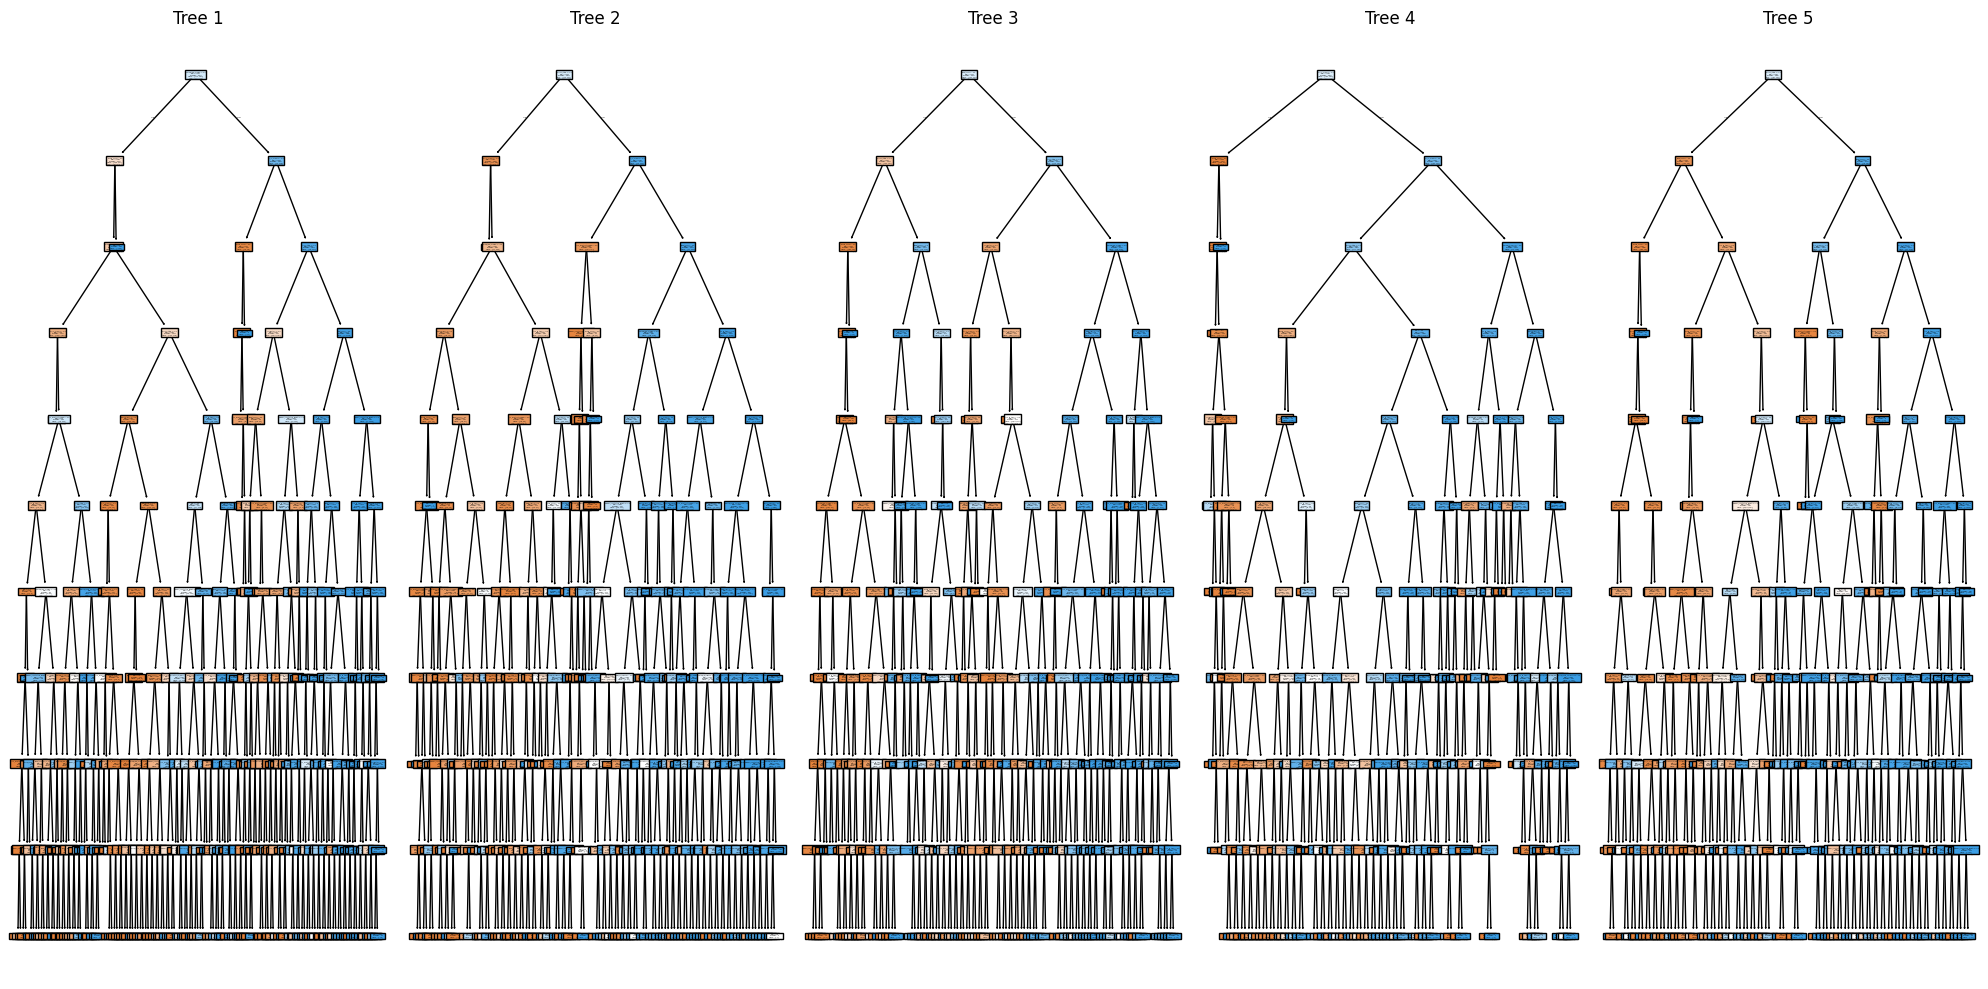

In [115]:
# Number of trees to plot
n_trees_to_plot = 5

# Create a figure to hold the plots
plt.figure(figsize=(20, 10))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)  # 1 row and n_trees_to_plot columns
    plot_tree(forest.estimators_[i], filled=True,
              feature_names=X.columns, class_names=["Legitimate (-1)", "Phishing (1)"])
    plt.title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()

### 5.2. Evaluation

After training the random forest, we evaluate its performance on the test dataset. This gives us an estimate of how well the model generalizes to unseen websites. We calculate:

- **Accuracy:** the proportion of correctly classified websites.  
- **Confusion matrix:** a detailed breakdown of predictions for phishing and legitimate sites.


'Accuracy of tree classifier on the test set: 0.97'

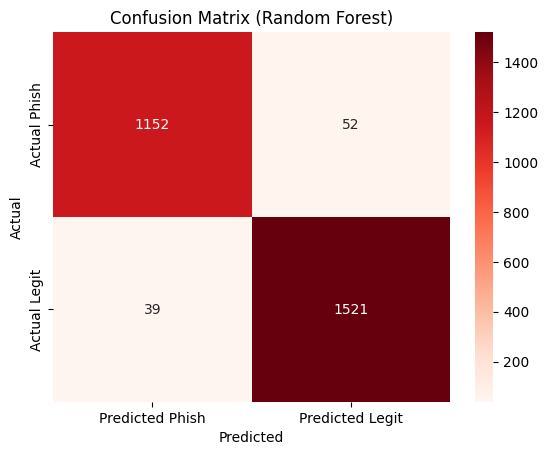

In [116]:
# Predict labels for the test set
y_pred2 = forest.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred2)
display(f"Accuracy of tree classifier on the test set: {accuracy_test:.2f}")

# Calculate the confusion matrix
cm_forest = confusion_matrix(y_test, y_pred2)

# Plot confusion matrix using Seaborn
sns.heatmap(cm_forest, annot=True, fmt="d", cmap="Reds",
            xticklabels=["Predicted Phish", "Predicted Legit"],
            yticklabels=["Actual Phish", "Actual Legit"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

- **True Positives (TP):** 1521 – legitimate sites correctly classified.  
- **False Negatives (FN):** 39 – legitimate sites incorrectly classified as phishing.  
- **False Positives (FP):** 52 – phishing sites incorrectly classified as legitimate.  
- **True Negatives (TN):** 1152 – phishing sites correctly classified.

We observed that reducing the sample size for each tree and increasing the tree depth improved the model's performance. Overall, the random forest achieved better results than a single decision tree.


### 5.3. Deployment

The random forest model can be deployed in a similar way to the decision tree, but with improved reliability due to its higher accuracy. In practice, the model could be integrated into web browsers, email filters, or corporate security systems to automatically detect phishing websites.

When a potentially phishing site is detected, the system can:

- Alert security analysts or end-users, showing the classification result.  
- Provide confidence scores or aggregate information from multiple trees to guide manual verification.  
- Generate reports on detected phishing attempts, false positives, and overall system performance.

The random forest can be periodically retrained with new data to adapt to evolving phishing tactics, ensuring that the model remains effective over time. Its ensemble structure reduces overfitting compared to a single tree, making predictions more reliable in real-world scenarios.
